## Apziva Project 1:
### Happy customers

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from sklearn.preprocessing import StandardScaler, LabelEncoder



In [3]:
# Import dataset
data = pd.read_csv('ACME-HappinessSurvey2020.csv')

Task:
Find the most useful customer hapiness segmentation to improve the marketing campaigns of the company

In [4]:
data

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [5]:
data.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [6]:
data.shape

(126, 7)

In [7]:
# Explore dataset
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
data.isna().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [9]:
# plot distributions function
def plot_distrib(df, ncols, nrows, figsize):
    vars_ = df.columns
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        _, nbins, _ = plt.hist(df[v], 50, color="g", alpha=0.6, label=v)
        plt.xlabel(v)
        plt.legend(loc="best")
        c = c + 1
    plt.show() 

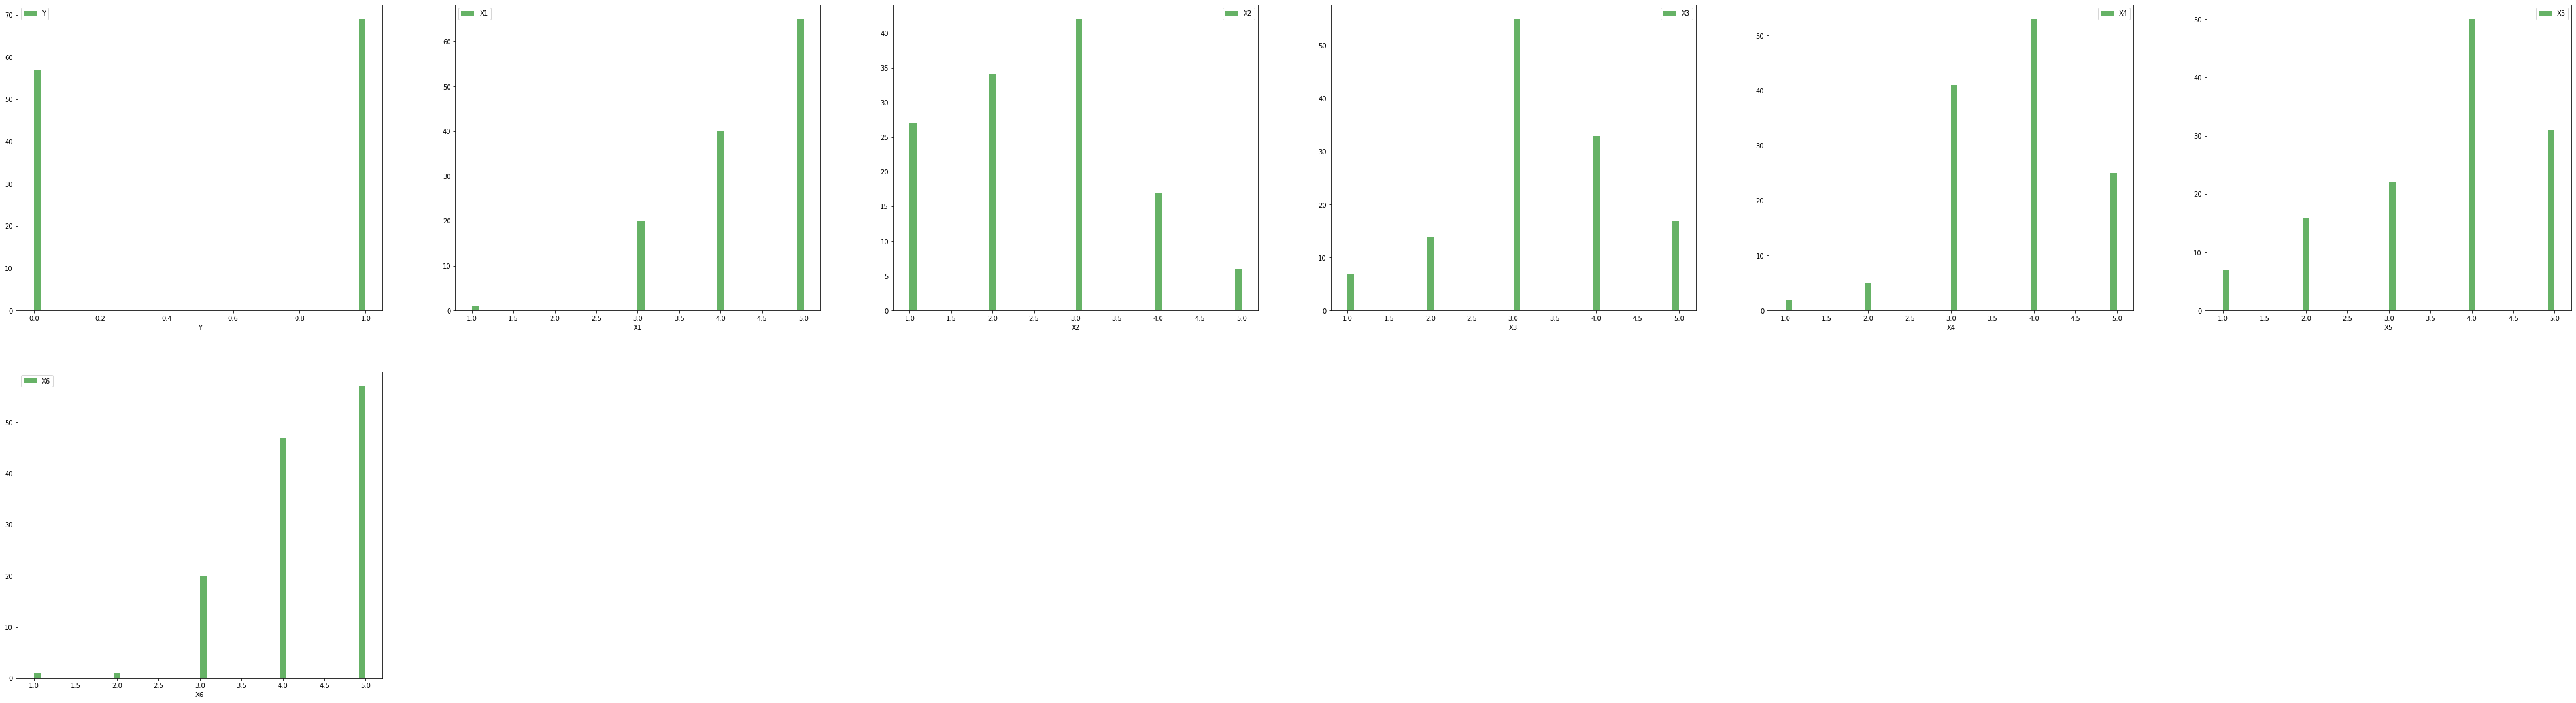

In [10]:
plot_distrib(data, ncols=6, nrows=5, figsize=(70, 50))

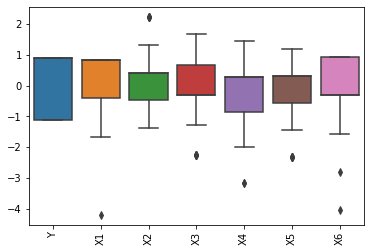

In [13]:
# scale data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

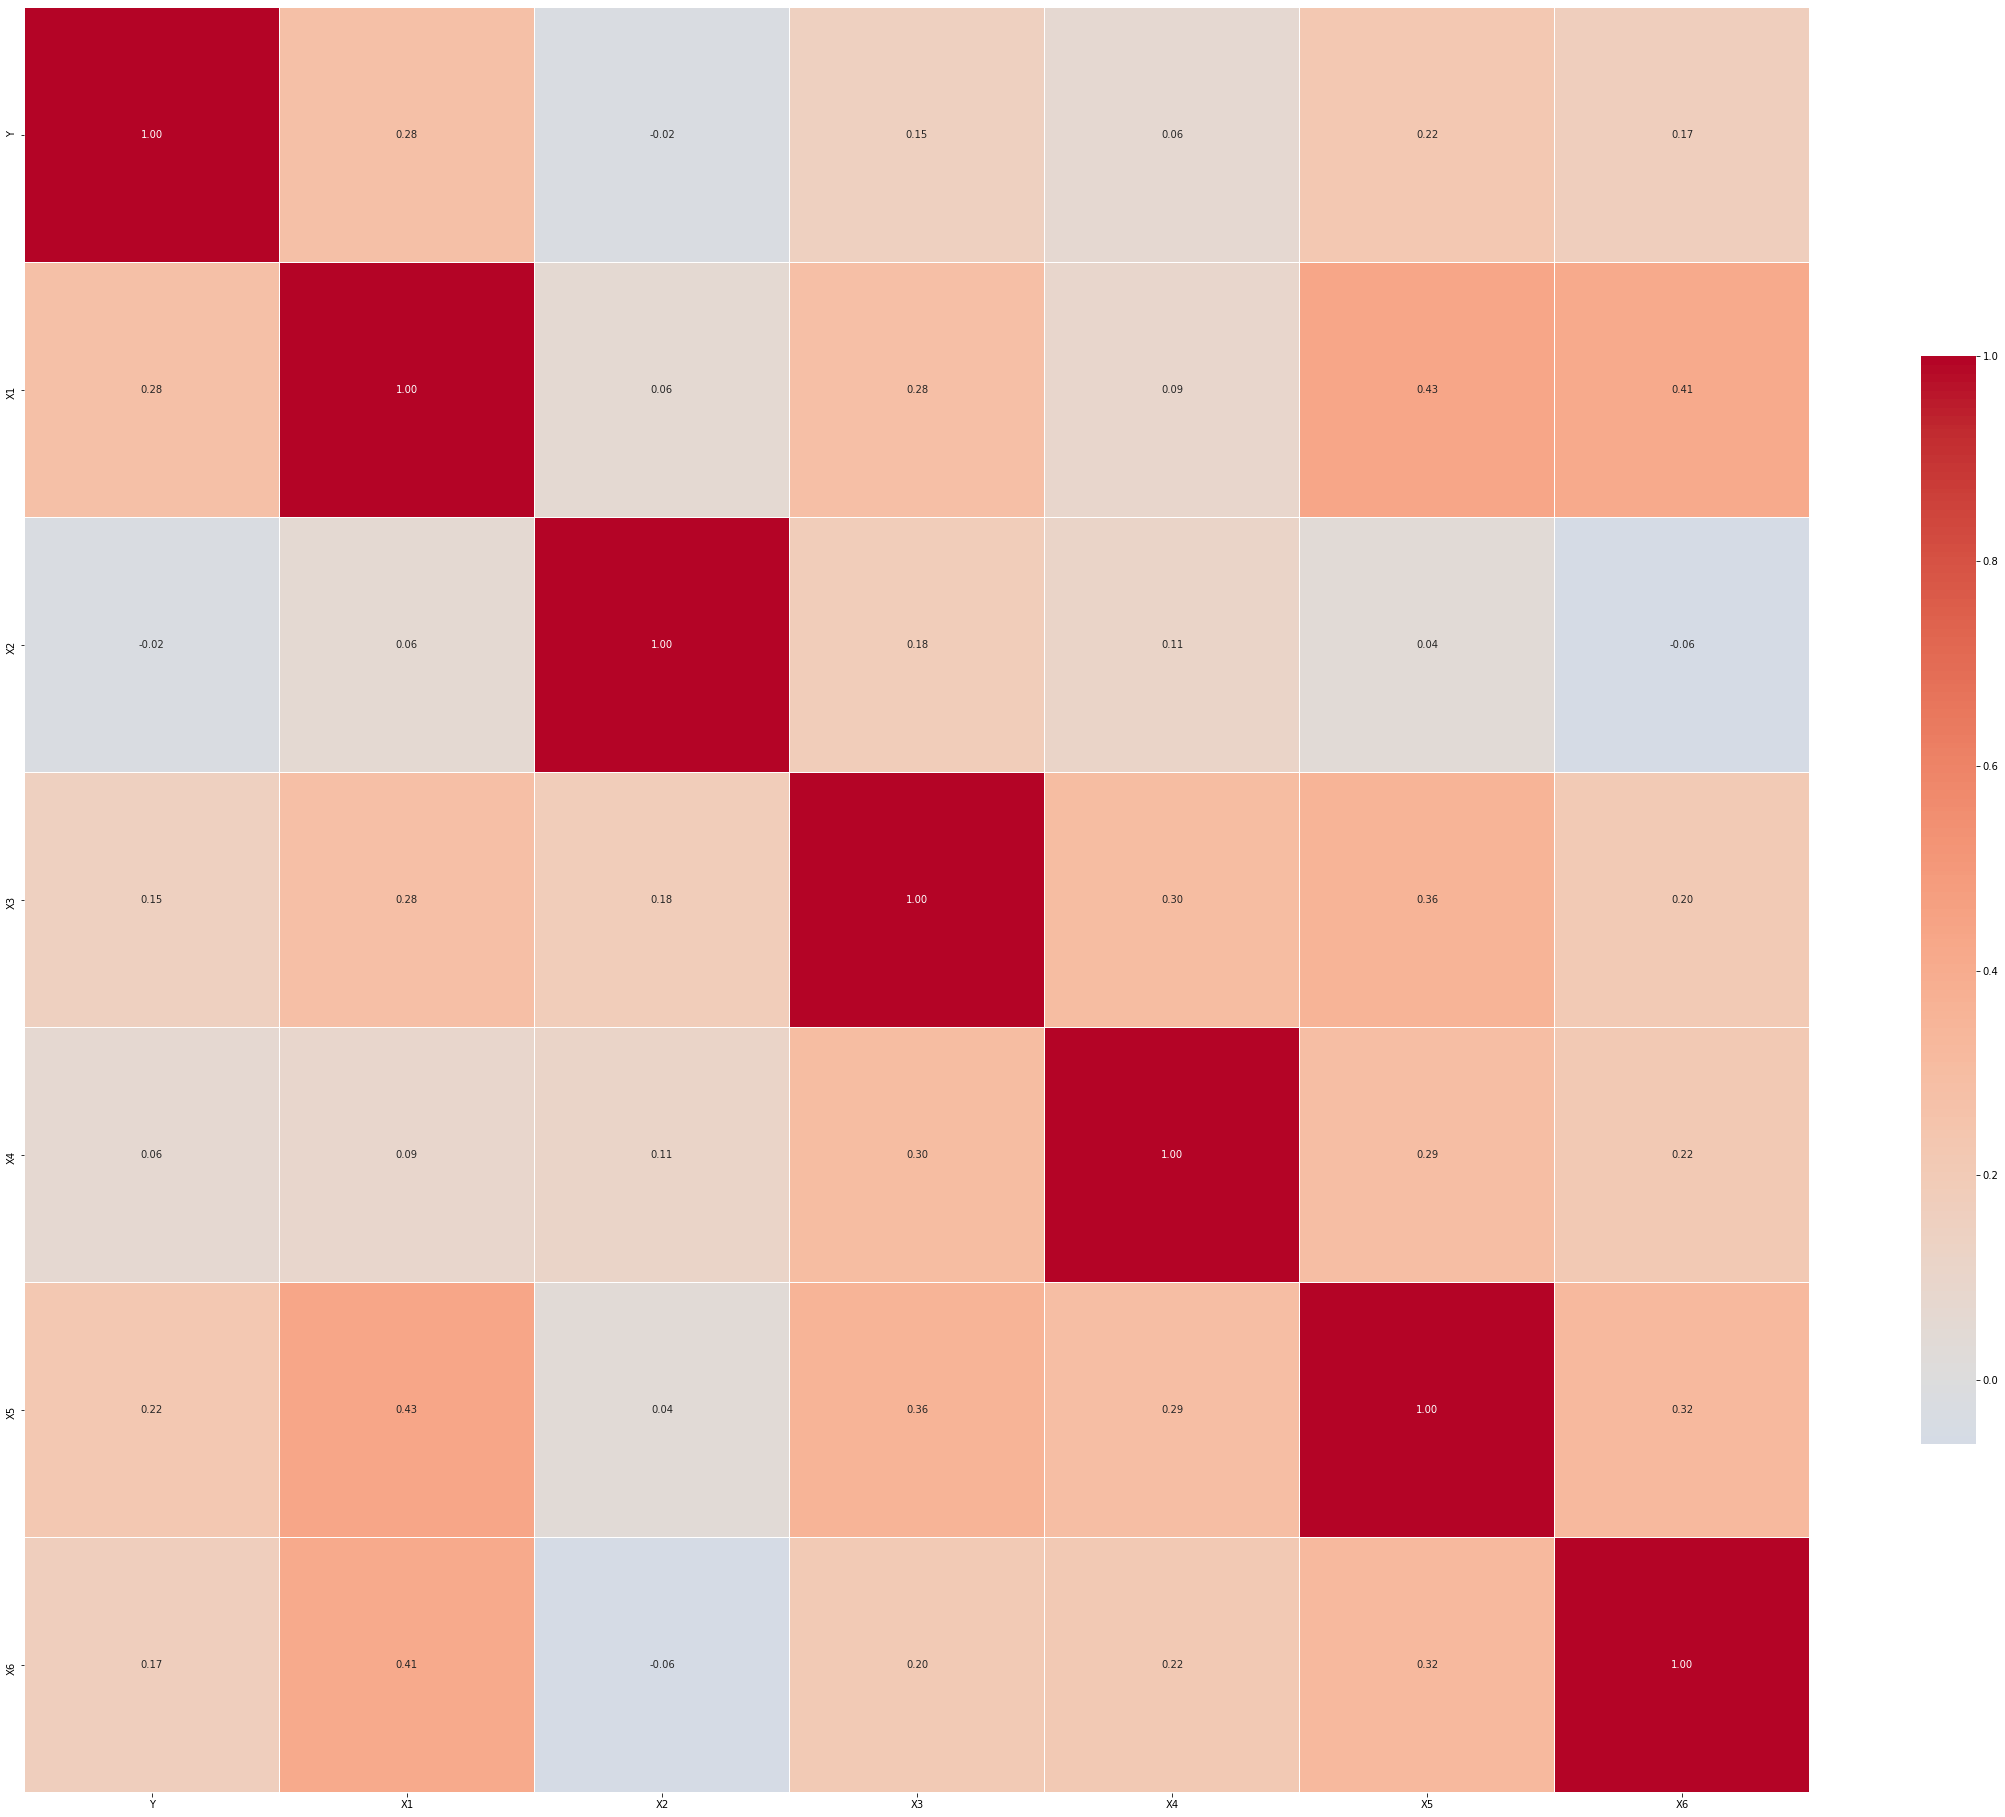

In [14]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(40, 40))
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [15]:
to_keep = [data.columns[0]]
for icol in range(1, len(data.corr().index)):
    if np.any((data.corr() > 0.85).iloc[: icol - 1, icol]):
        print(f"{data.corr().index[icol]} is out")
    else:
        to_keep.append(data.corr().index[icol])
print(to_keep)

['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']


In [17]:
x = data_scaled.drop(columns=['Y'], axis=1)

In [18]:
scaler = StandardScaler()

data_scaled = pd.DataFrame(
    scaler.fit_transform(x), columns=x.columns
)
data_scaled

,X1,X2,X3,X4,X5,X6
0,-1.67332,0.421676,-0.303642,0.291150,-1.444166,-0.315061
1,-1.67332,-0.478852,-0.303642,1.437552,0.305497,-1.555612
2,0.83666,0.421676,-0.303642,-0.855253,-0.569335,0.925491
3,0.83666,1.322205,-0.303642,-0.855253,-0.569335,0.925491
4,0.83666,1.322205,-0.303642,-0.855253,-0.569335,0.925491
...,...,...,...,...,...,...
121,0.83666,-0.478852,-0.303642,0.291150,0.305497,-1.555612
122,0.83666,-0.478852,-0.303642,0.291150,-1.444166,0.925491
123,0.83666,0.421676,-0.303642,0.291150,0.305497,0.925491
124,-0.41833,0.421676,-0.303642,0.291150,0.305497,0.925491


In [20]:
# Setting target and features
y = data_scaled.drop(columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'] ,axis=1)

In [29]:
# Import all method that i used for predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

# Make a function to running for all model
# def class_report(x,y,model):
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

    
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)
    
print('Classification Data Test')
print(classification_report(y_test,prediction_test))
print('========================================================')
print('Classification Data Train')
print(classification_report(y_train,prediction_train))

ValueError: bad input shape (94, 0)

In [24]:
class_report(x,y,)


NameError: name 'clf' is not defined